In [1]:
%matplotlib inline
import control as co
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Compensador proporcional e derivativo

- Atuando em conjunto com um compensador proporcional, acelera o sistema.
- Permitiu o uso de kps maiores (comparar com o notebook de compensadores_P).
- Enquanto aumentar o kp aumenta o overshoot neste sistema, aumentar o kd diminui o mesmo.

In [2]:
wn = 5
zeta = 0.3
kp = 20
kd = 5

In [3]:
G = co.TransferFunction([wn**2], [1, 2*zeta*wn, 0])

In [4]:
G


    25
---------
s^2 + 3 s

In [5]:
# Compensador
C = co.TransferFunction([kp], [1]) + co.TransferFunction([kd, 0], [1])

In [6]:
C


5 s + 20
--------
    1

In [7]:
FTMF = C*G / (1 + C*G)

In [8]:
FTMF


   125 s^3 + 875 s^2 + 1500 s
--------------------------------
s^4 + 131 s^3 + 884 s^2 + 1500 s

In [9]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(FTMF, interval)

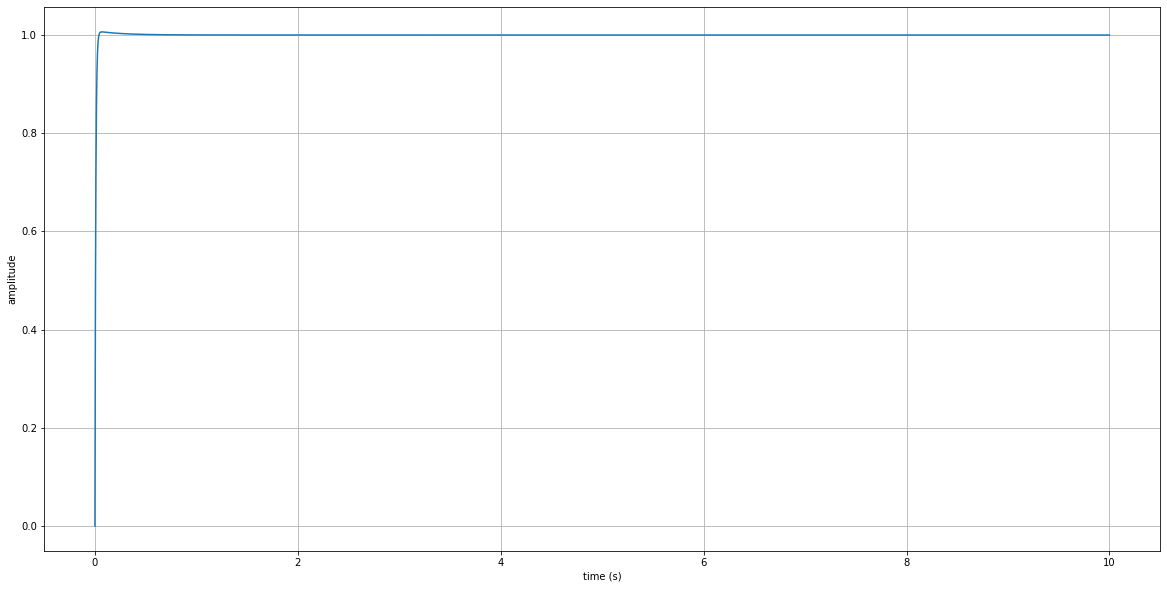

In [10]:
# Resposta ao degrau
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()

In [11]:
error = 1 - y

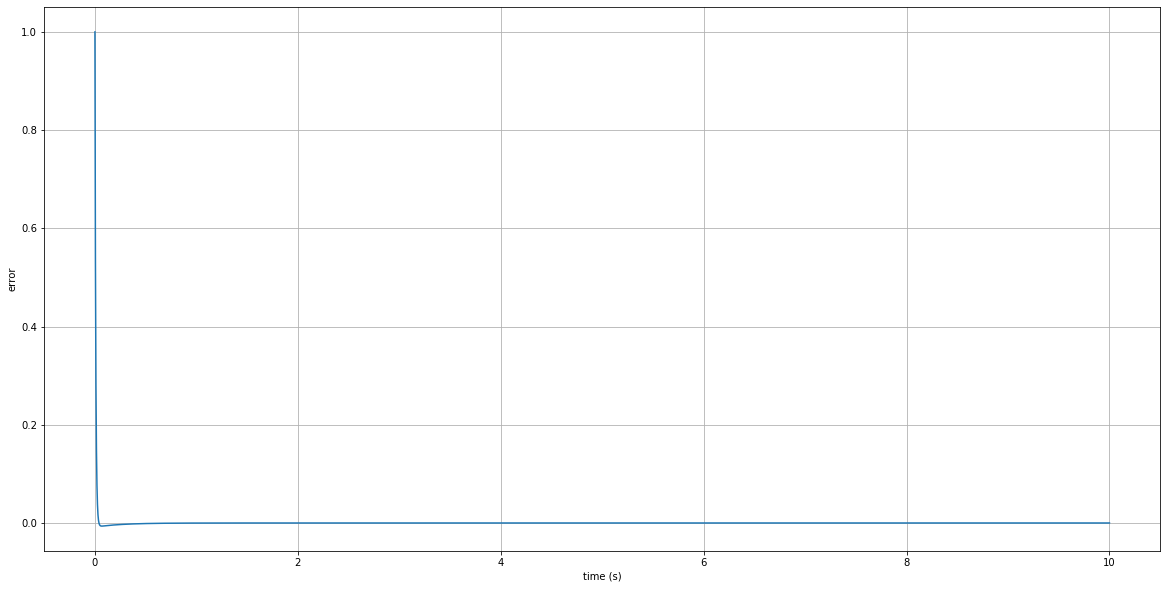

In [12]:
# Erro
plt.plot(t, error)
plt.xlabel("time (s)")
plt.ylabel("error")
plt.grid()